In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["figure.dpi"] = 300
plt.rcParams["text.latex.preamble"] = r"\usepackage{bm}"
plt.rcParams["text.usetex"] = True

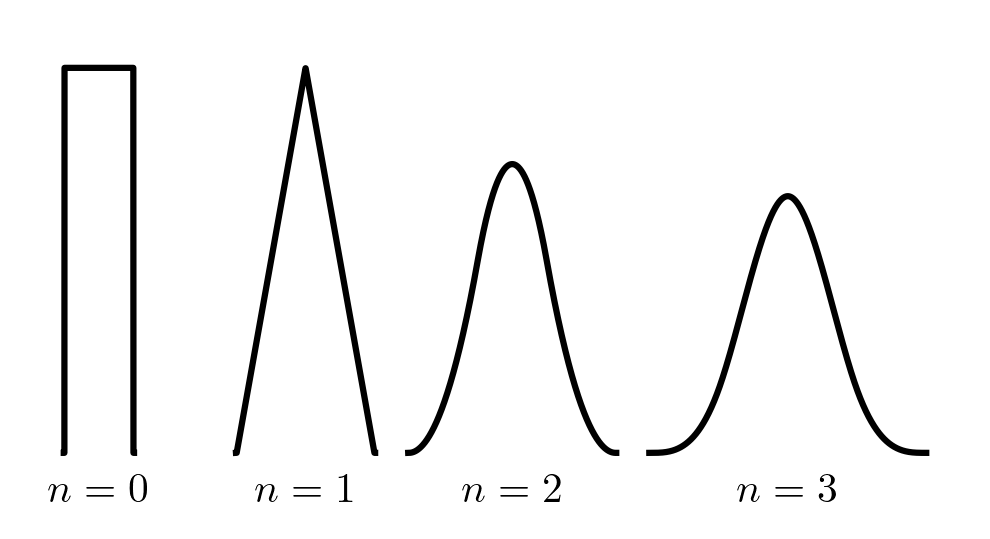

In [27]:
def shape_function(x0, dx, n):
    x = np.linspace(x0 - (n + 1) * dx / 2 - 0.01, x0 + (n + 1) * dx / 2 + 0.01, 1000)
    y = np.zeros_like(x)
    if n == 0:
        mask = np.abs(x - x0) < dx / 2
        y[mask] = 1
    elif n == 1:
        mask = np.abs(x - x0) < dx
        y[mask] = 1 - np.abs(x[mask] - x0) / dx
    elif n == 2:
        mask1 = np.abs(x - x0) < dx / 2
        mask2 = (np.abs(x - x0) >= dx / 2) & (np.abs(x - x0) < 1.5 * dx)
        x_ = (x[mask1] - x0) / dx
        y[mask1] = 0.75 - x_**2
        x_ = (x[mask2] - x0) / dx
        y[mask2] = 0.5 * (1.5 - np.abs(x_)) ** 2
    elif n == 3:
        mask1 = np.abs(x - x0) < dx
        mask2 = (np.abs(x - x0) >= dx) & (np.abs(x - x0) < 2 * dx)
        x_ = (x[mask1] - x0) / dx
        y[mask1] = (4 - 6 * x_**2 + 3 * np.abs(x_) ** 3) / 6
        x_ = (x[mask2] - x0) / dx
        y[mask2] = (2 - np.abs(x_)) ** 3 / 6
    return x, y


plt.figure(figsize=(4, 2))
plt.plot(*shape_function(-4, 1, 0), c="k")
plt.plot(*shape_function(-1, 1, 1), c="k")
plt.plot(*shape_function(2, 1, 2), c="k")
plt.plot(*shape_function(6, 1, 3), c="k")

for i, x in enumerate([-4, -1, 2, 6]):
    plt.text(x, -0.05, f"$n={{{i}}}$", ha="center", va="top", fontsize=10)

plt.xlim(-5, 8.5)
plt.ylim(-0.1, 1.1)
plt.axis("off")
plt.savefig("shape_functions.png", bbox_inches="tight")